# Supervised Learning Final Project

## Introduction

In this final project, we are going to explore a dataset on stroke patients. We have a large dataset of approximately 5000 rows where a patient is determined to have a stroke or not. That patient information also comes with several attributes that we will put into machine learning models to help predict the chances a patient has a stroke depending on the attributes given.
In this project, we will:
1. Import the data
2. Clean the data
3. Do exploratory data analysis
4. Create a KNN model and Random Forest model
5. Summarize results and analysis

### Data
The data used for this project is a dataset off of Kaggle. The title is called "Stroke Prediction Dataset" uploaded by Fedesoriano. The link to the data is given here:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

First off, we will import the given dataset to the Jupyter Notebook.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("https://raw.githubusercontent.com/kech3776/Stroke_Predction/main/healthcare-dataset-stroke-data.csv")

Now we take a look at the first few rows of the dataset and the shape of the dataset.

In [140]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [141]:
df.shape

(5110, 12)

As seen above, there are 12 attributes given in the dataset with 5110 entries.
The 12 attributes are as shown:
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1 if the patient had a stroke or 0 if not

## Data Cleaning
After an initial look at the dataset, we will clean the data by removing irrelavent columns, converting classifications to something useable, and imputing any rows that have null values of any kind.

First off, the unique identifier is not a relavant column. We will drop that column from our data. We will also drop the work_type column.

In [142]:
df = df.drop('id',axis = 1)

In [143]:
df = df.drop('work_type', axis = 1)

While looking at the 'smoking_status', of the 5000 or so rows, there looks to be around 1500 rows where the smoking status is unknown. Since there are so many unknown entries, we will drop this column too.

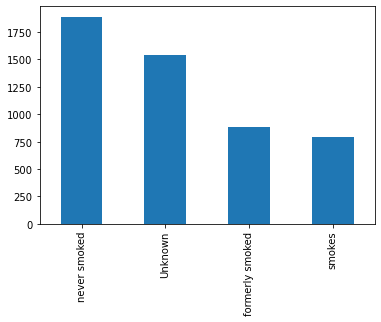

In [144]:
df['smoking_status'].value_counts().plot(kind = 'bar')
df = df.drop('smoking_status',axis = 1)

Next, we replace the "No" or "Yes" in ever_married to 0 for no and 1 for yes. We do the same from Residence_type by replacing "Rural" with 0 and "Urban" with 1. This will give us the ability to use these columns in our model.

In [145]:
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban':1})

Now we are going to deal the the gender column. First, we remove the 'Other' in gender since there is only one row with that label.

In [146]:
df=df[df.gender != 'Other']
df.shape

(5109, 9)

Next, we create two more columns. The male column will be 1 if male and 0 if female. The female column will be 1 if female and 0 if male. 

In [147]:
female_male = pd.get_dummies(df['gender'])
female_male.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


Then we attach the Female and Male column back to the main dataframe. We also drop the gender column since that is not needed anymore.

In [148]:
df[female_male.columns] = female_male
df = df.drop('gender', axis = 1)
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male
0,67.0,0,1,1,1,228.69,36.6,1,0,1
1,61.0,0,0,1,0,202.21,NaN,1,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1
3,49.0,0,0,1,1,171.23,34.4,1,1,0
4,79.0,1,0,1,0,174.12,24.0,1,1,0


The next step in inspecting the data is to look for any null values.

In [149]:
# prints number of null values detected by .isnull() and string none
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

age 0 0
hypertension 0 0
heart_disease 0 0
ever_married 0 0
Residence_type 0 0
avg_glucose_level 0 0
bmi 201 0
stroke 0 0
Female 0 0
Male 0 0


As seen from the results above, it looks like the BMI column has 201 instances of null values. There are no instances of any other types of null values in any of the other columns. For the 201 instances of null values, we are going to use the KNN imputer to fill in these entries. Below is a histogram of the BMI showing how the BMI is spread out.

<AxesSubplot:>

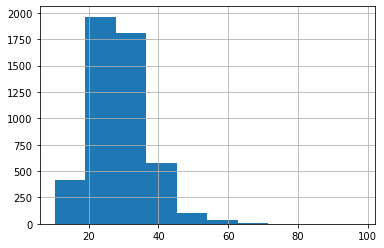

In [111]:
df['bmi'].hist()

In [150]:
#impute the missing data using KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns = ['Age', 'Hypertension', 'Heart_Disease', 'Ever_Married', 'Residence_Type', 'Avg_Glucose_Lvl', 
                                                    'BMI', 'Stroke', 'Female','Male'])

<AxesSubplot:>

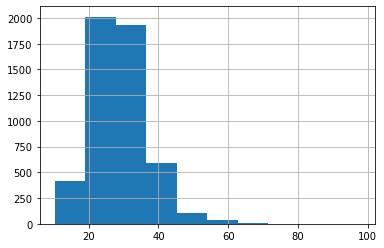

In [151]:
df['BMI'].hist()

Looking at the BMI histogram again, it looks the the KNN impute kept the spread of the data mostly the same.
Below, we check for any null values again just to make sure we got all of the null values. There are no longer any null values so our data has been cleaned and is good to go.

In [152]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

Age 0 0
Hypertension 0 0
Heart_Disease 0 0
Ever_Married 0 0
Residence_Type 0 0
Avg_Glucose_Lvl 0 0
BMI 0 0
Stroke 0 0
Female 0 0
Male 0 0


## Exploratory Data Analysis

In this exploratory data analysis, we will take a look at a heat map and the proportions of many of the attributes to get a good idea of what our data looks like. In the heat map below, we can see all of the correlations between all of the attributes. First off the Male and Female columns obviously have a -1 correlation since they are always either or. Another notable correlation is age and ever being married. It makes sense since the chances of someone being married at least once is higher when someone is older. Outside of these relationships, most other attributes do not have a notable correlation with other attributes.

Text(0.5, 1.0, 'Correlation Heatmap')

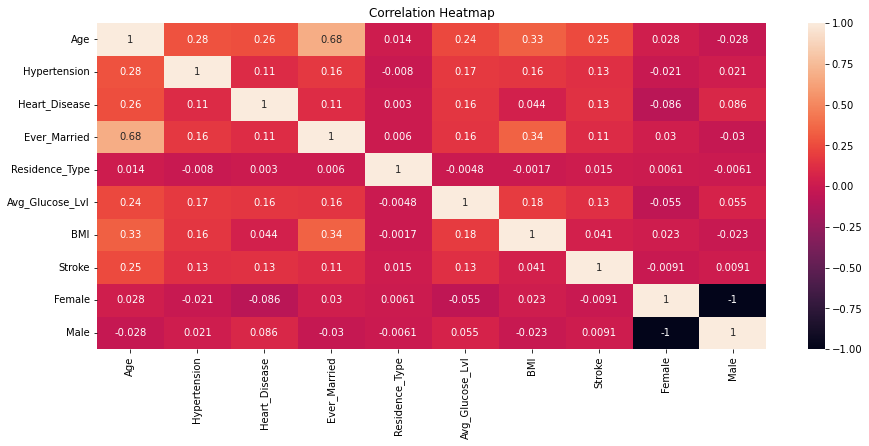

In [153]:
import seaborn as sns
df_corr = df.corr()
plt.figure(figsize = (15,6))
heatmap = sns.heatmap(df_corr, annot = True)
heatmap.set_title('Correlation Heatmap')

KNN does not have feature importance since it just picks whatever is close nearest. While KNN does not have a feature importance function, the Random Forest Classifier does. Here we made a model and explore the feature importances for the dataset. As seen below, the attributes with the largest importance are Age, Average Glucose Levels, and BMI. 

Attribute: Age Score: 0.23972497311915725
Attribute: Hypertension Score: 0.02492898521415434
Attribute: Heart_Disease Score: 0.01959631706696293
Attribute: Ever_Married Score: 0.01821703112208377
Attribute: Residence_Type Score: 0.033425814892423446
Attribute: Avg_Glucose_Lvl Score: 0.3359063691414142
Attribute: BMI Score: 0.2958299921337079
Attribute: Female Score: 0.01645357871506728
Attribute: Male Score: 0.015916938595028886


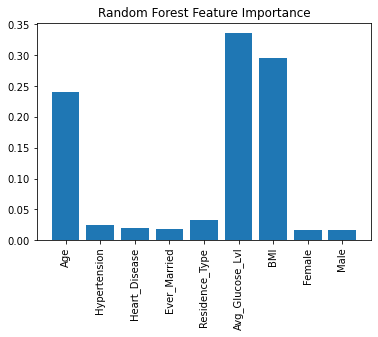

In [154]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Stroke',axis = 1)
y = df['Stroke']
model = RandomForestClassifier().fit(X,y)
importance = model.feature_importances_
x_column = X.columns
for i in range(len(importance)):
    print('Attribute:', x_column[i], 'Score:', importance[i])
plt.bar(x_column, importance)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")
plt.show()

Next we take a look at the rate of which strokes occur. Looking at the data, there seems to be only around 5% positive rate for this dataset. In the next section, we will deal with the large imbalance in our dataset in the next section by normalizing the data in a way to overcome the large imbalance of results.

Text(0.5, 1.0, 'Stroke Rate')

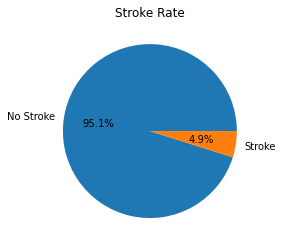

In [155]:
s = df['Stroke'].value_counts().tolist()
labels = ['No Stroke', 'Stroke']
plt.pie(s,autopct = "%.1f%%", labels = labels)
plt.title("Stroke Rate")

## Modeling

In this section we will be modeling the dataset. 
1. We will be addressing how to fix the large imbalance in our results data. 
2. We will split up our data into training and testing data.
3. We create a KNN model from our training data and use it on our test data.
4. We create a Random Forest model from our training data and use it on our test data.

First off, we split the data into X and y data.

In [156]:
X = df.drop('Stroke',axis = 1)
y = df['Stroke']

Now we use SMOTE in order to address the result imbalance between rows that have a positive stroke reading and rows that don't have a positive stroke reading. As you can see, through oversampling we now have the same number of rows with a positive reading compared to a negative reading. This deals with the issue of the large imbalance in our dataset.

In [157]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state = 23)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 4860, 1.0: 249})
Resampled dataset shape Counter({1.0: 4860, 0.0: 4860})


Now we split the X and y data using train_test_split so we have both training data and test data. The test data size will be 20% of the whole dataset.

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.2, random_state = 9)

In [159]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:',y_train.shape)
print('y_test:', y_test.shape)

X_train: (7776, 9)
X_test: (1944, 9)
y_train: (7776,)
y_test: (1944,)


Our first model uses the K-Nearest Neighbors algorithm. The KNN algorithm will help predict if a patient has a stroke or not depending on the attributes of the training data. The data with the most similar attributes will be taken into account to predict the test data. In this model, we loop from k=1 to k= 9 in order to find the k value that gives the highest score. When running the model against the test data, k = 2 gives use the hightest score when using the test data.

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
knn_objects = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    knn_scores.append(round(knn.score(X_test, y_test),4))
    knn_objects.append(knn)
knn_scores

[0.9162, 0.9244, 0.911, 0.911, 0.9007, 0.9079, 0.893, 0.9007, 0.8894]

Our second model uses the Random Forest algorithm. The Random Forest algorithm generates a number of estimators to try to determine the stroke outcome based on the decision of a majority prediction from the multitude of decision trees. In this model we also use GridSearchCV to tune the hyperparameters to find the highest score.

In [161]:

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [25,50,100,200],
    'max_depth':[2,4,8,16,32,64],
    'criterion':['gini','entropy']
}

cv_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params)
cv_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, 64],
                         'n_estimators': [25, 50, 100, 200]})

After running the model the best parameters is 200 estimators with a max depth of 64 using entropy.

In [162]:
print(cv_rf.best_params_)
print(cv_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 32, 'n_estimators': 200}
0.964634523347027


## Results and Analysis

### K-Nearest Neighbor Model

In the KNN model, the k value that produced the best score was k=2 with a score of about 0.92. Below is graph of the scores depending on the k value. For the most part, it looks like as k increases, the accuracy score decreases.

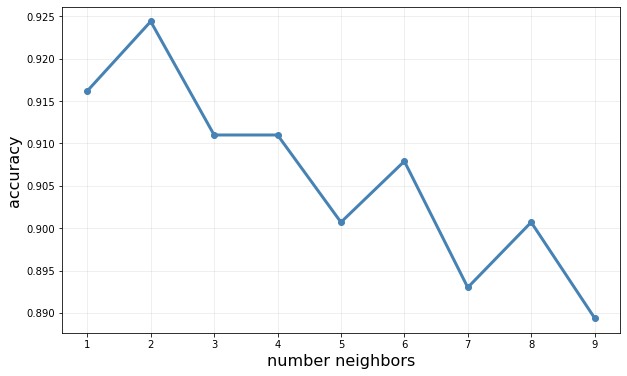

In [130]:
allks = range(1,10)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(allks, knn_scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,10,1))
ax.grid(alpha=0.25)

Next we will look at the confusion matrix for our KNN model. For our KNN model, there were a total of 1944 data points. Of those data points, 824 were correct predicted as no stroke and 957 that were correctly predicted to be a stroke. Of the 164 that were not correctly predicted, 141 were a false positive and 22 were a false negative. In the case of detecting strokes, a false positive is seen as a more favorable error than a false negative if there were the same number of total errors in both models. 

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

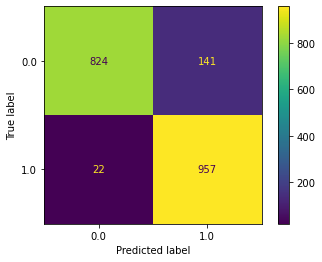

In [132]:
knn_y_pred = knn_objects[0].predict(X_test)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cmplot = ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = knn_objects[0].classes_)
knn_cmplot.plot()

### Random Forest Model

In the Random Forest model, the hyperparameters that produced the highest score has 100 estimators, a max depth of 32 and used entropy over gini. The accuracy for the model against the test data was 0.96. For the confusion matrix, of the 1944 data points, 954 were correctly predicted as no stroke and 920 were correctly predicted as a stroke. Of the 70 that were not correctly predicted, 11 were a false positive and 59 were a false negative. Unlike the KNN model, the Random Forest model produces more false negatives than false positives compared to the KNN model. However, the Random Forest model produces fewer total errors than the KNN model.

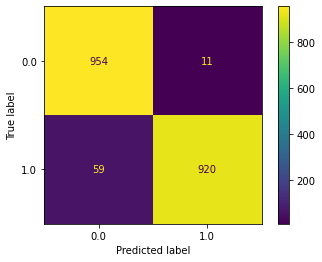

In [133]:
rf_y_pred = cv_rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cmplot = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = cv_rf.classes_)
rf_cmplot.plot()

### Combined ROC

Since there is a notable difference in the amount of type one errors and type two errors shown in the confustion matricies above, here is an ROC curve to show the differences between the two models. As seen in the graph, the Random Forest model has a larger area under the curve which means it performed better in predicting strokes.

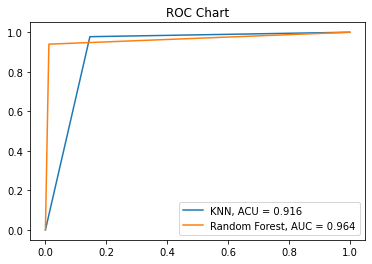

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,_ = roc_curve(y_test, knn_y_pred)
auc = round(roc_auc_score(y_test, knn_y_pred),3)
plt.plot(fpr, tpr, label = "KNN, ACU = " + str(auc))

fpr,tpr,_ = roc_curve(y_test, rf_y_pred)
auc = round(roc_auc_score(y_test, rf_y_pred),3)
plt.plot(fpr, tpr, label = "Random Forest, AUC = " + str(auc))
plt.title("ROC Chart")
plt.legend()

## Conclusion

After going through this this final project, I have gained the experience and confidence to do a full supervised machine learning analysis starting from searching for a dataset to making conclusions about that dataset. In a non-exhaustive list of techniques learned and used for this project, I:
- searched for and determined an appropriate dataset for supervised learning models
- developed a goal for the project
- cleaned the data through dropping unneeded rows and columns
- imputed the data to fill in empty rows
- explored correlation and attribute importance
- used oversampling to address dataset imbalance
- ran both a KNN and Random Forest Model on the dataset
- analyzed the results of the models with confusion matricies and ROC curves

As for any aspects that did not work out, I did not keep all of the columns in the dataset. I did not want to impute the smoking status in the original dataset since so much of the data was unknown. I suspect that the smoking status could have had a notable attribute significance if I made it work out.
Possible improvements to the project could include a different type of dealing with result imbalance. Instead of using oversampling, I could have also tried out undersampling before fitting it into the KNN and Random Forest model. Another possible improvement to the project would be to include more supervised learning models. Adding a section for a Logistic Regression model and a Support Vector Machine model would give us more insight on which kind of supervised machine learning model would work best.